In [160]:
#Import
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pandas as pd
#from math import *
import locale
import webbrowser

from locale import atof

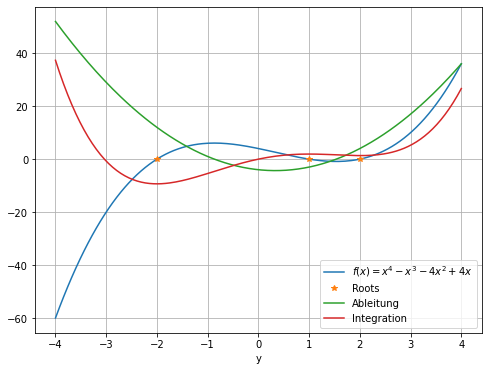

In [4]:
# Beispiel aus VL
# f(x) = x^4 - x^3 -4x^2 + 4x
# x = [-4, -2, 0, 2, 4]
polynom1 = np.array([1, -1, -4, 4])
x = np.linspace(-4,4,200)
y = np.polyval(polynom1,x)

Pol_roots = np.roots(polynom1)
y_0 = np.zeros(Pol_roots.shape)
Pol_Abl = np.polyder(polynom1)
Pol_Int = np.polyint(polynom1)

plt.figure('Polynom',figsize=(8, 6))
plt.plot(x,y, label='$f(x) = x^4 - x^3 -4x^2 + 4x$')
plt.plot(Pol_roots, y_0, '*', label='Roots')
plt.plot(x,np.polyval(Pol_Abl,x), label='Ableitung')
plt.plot(x,np.polyval(Pol_Int,x), label='Integration')

plt.xlabel('x')
plt.xlabel('y')
plt.legend()
plt.grid()

2086.5428571428565
2268.797321428572


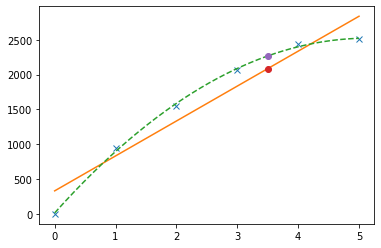

In [42]:
#Übunng: 5.0
x = [0, 1, 2, 3, 4, 5]
x2 = np.linspace(0,5,1000)
y = [0, 940, 1554, 2069, 2438, 2509]

y_int_1d = np.polyfit(x,y,1)
y_int_2d = np.polyfit(x,y,2)
p_1d = np.poly1d(y_int_1d)
p_2d = np.poly1d(y_int_2d)

plt.plot(x,y,'x')
plt.plot(x2,p_1d(x2),'-')
plt.plot(x2,p_2d(x2),'--')
plt.plot(3.5,p_1d(3.5),'o')
plt.plot(3.5,p_2d(3.5),'o')
plt.show

print(p_1d(3.5))
print(p_2d(3.5))


125.0000000000001
6125.000000000005


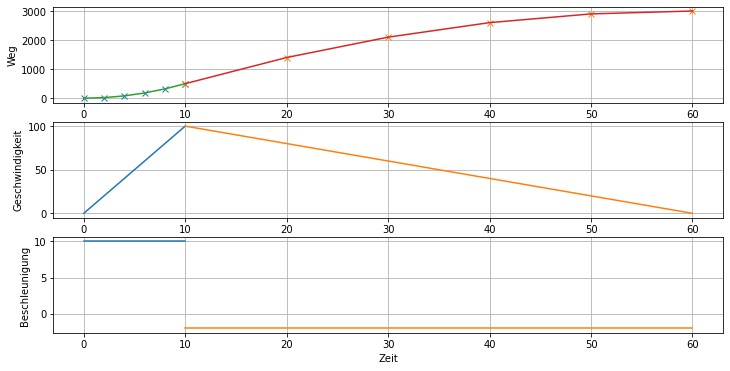

In [102]:
#UE5.1
x1 = [0, 2, 4, 6, 8, 10]
x2 = [10, 20, 30, 40, 50, 60]
y1 = [0, 20, 80, 180, 320, 500]
y2 = [500, 1400, 2100, 2600, 2900, 3000]

#Funktionsfitting mit Resultat von koeffizienten
p1 = np.polyfit(x1,y1,2)
p2 = np.polyfit(x2,y2,2)
#Polynom mit Koeffizienten p ableiten
p1_1abl = np.polyder(p1)
p2_1abl = np.polyder(p2)
p1_2abl = np.polyder(p1_1abl)
p2_2abl = np.polyder(p2_1abl)

#Koeffizienten umwandeln in Polynom
y1_int = np.polyval(p1,x1)
y2_int = np.polyval(p2,x2)
v1 = np.polyval(p1_1abl,x1)
v2 = np.polyval(p2_1abl,x2)
a1 = np.polyval(p1_2abl,x1)
a2 = np.polyval(p2_2abl,x2)


fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,6))


ax1.plot(x1,y1,'x')
ax1.plot(x2,y2,'x')
ax1.plot(x1,y1_int)
ax1.plot(x2,y2_int)
ax1.set_ylabel('Weg')
ax1.grid()

ax2.plot(x1,v1)
ax2.plot(x2,v2)
ax2.set_ylabel('Geschwindigkeit')
ax2.grid()

ax3.plot(x1,a1)
ax3.plot(x2,a2)
ax3.set_ylabel('Beschleunigung')
ax3.set_xlabel('Zeit')
ax3.grid()
plt.show


#print(y_int_2d)
print(np.polyval(p1,5))
print(np.polyval(p1,35))



    Zeit  Traversenweg   Last  Dehnung  Zugspannung
9    0.3        0.0028  0.067  0.00085        19.29
10   0.4        0.0059  0.076  0.00224        22.06 [1992.8057554    17.59611511]
--------------------------------
Die Maximale Last ist bei: 
Zeit             112.56801
Traversenweg       1.87630
Last               5.26800
Dehnung            0.38646
Zugspannung     1526.96000
Name: 1132, dtype: float64


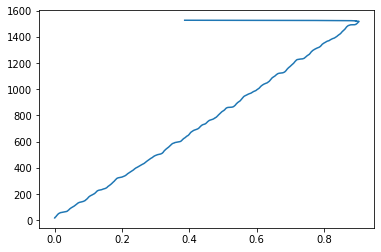

In [124]:
#UE5.2 recht aufwendig die Aufgabe...

# ------ Einlesen der Daten -------
df = pd.read_csv('UE5_Specimen_RawData_1.csv', sep=";", decimal=',', names=['Zeit','Traversenweg','Last','Dehnung','Zugspannung'])
ProbenName = df.loc[0]['Traversenweg']
Startdatum = df.loc[1]['Traversenweg']
Querschnitt = df.loc[2]['Traversenweg'] # in mm^2
Probennlänge = 150 # in mm
#Auslassen der ersten Zeilen
df = df.drop([0,1,2,3,4,5])
#ersetzen von ',' zu '.'
df['Zeit'] = df['Zeit'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['Traversenweg'] = df['Traversenweg'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['Last'] = df['Last'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['Dehnung'] = df['Dehnung'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['Zugspannung'] = df['Zugspannung'].apply(lambda x: float(x.split()[0].replace(',', '.')))

#------ Filtern der Daten --------
df_filterd = df[(df.Dehnung > 0)]

#------ Berechnug des Elastizitätsmoduls ------
df_elast = df[(df.Dehnung > 0.0005) & (df.Dehnung < 0.0025)]

p = np.polyfit(df_elast.Dehnung,df_elast.Zugspannung,1)
print(df_elast,p)

# def calcEModul(strain,stress): # search for position of 0,05% and 0,25% in strain data 
#     pos05 = np.nanargmin(np.abs(strain-0.0005)) # nanargmin kann mit nan umgehen! 
#     pos25 = np.nanargmin(np.abs(strain-0.0025)) 
#     p = np.polyfit(strain[pos05:pos25],stress[pos05:pos25],1) 
#     return p

#------ Berechnug der Verssagenslast ------ = Maximale Last?
F_max = df_filterd['Last'].max()
df_Last_max = df_filterd.loc[df_filterd['Last'].idxmax()]
print('--------------------------------')
print(f'Die Maximale Last ist bei: \n{df_Last_max}')

#print(f'x={x}, y={y}')

#------ Plotten des Spannungs-Dehnugs-Diagramm -------
plt.plot(df_filterd['Dehnung'], df_filterd['Zugspannung'])
#------ Statistische Auswertung --------


In [134]:
#Aufgabe 5.3.a
#Lösen: np.linalg.solve(A,b)
#Inverse: np.linalg.inv(A)
#PseudoInverse: np.linalg.pinv(A)
#Näherungslösung: np.linalg.lstsq(A,b)
#Determinate: d=np.linalg.det()
#Einheitsmatrix/Singularität: I=np.dot(A, np.linalg. inv (A))
#Konditionszahl: c=np.linalg.cond()

# 𝑥1−2𝑥2+𝑥3=6 
# 2𝑥1+𝑥2−𝑥3=−3 
# −𝑥1−4𝑥2+3𝑥3=14

self.A = [[1,-2,1],
     [2,1,-1],
     [-1,-4,3]]
self.b = [6,-3,14]
x = np.linalg.solve(self.A,self.b)
print(f'x ist {x}')



x ist [ 1.00000000e+00 -2.53765263e-15  5.00000000e+00]


In [198]:
# Funktion zum Lösen der Gleichungssysteme
class Matrix_Löser:
    def __init__(self,A,b) -> None:
        self.A = A
        self.b = b

    def Lösungsfunktion(self):
        try:
            self.A_inv = np.linalg.inv(self.A)
            self.cond = np.linalg.cond(self.A)
            self.I=np.dot(self.A, np.linalg. inv (self.A))
            self.x = np.linalg.solve(self.A,self.b)
            self.x_Näherung=None
            print(f'Die Konditionszahl beträgt: {self.cond}')
            print(f'Die Inverse Matrix ist: \n{self.A_inv}')
            print(f'Die Matrix ist Singulär und die Einheitsmatrix Matrix ist: \n{self.I}')
            print(f'Der Lösungsvektor ist: \n{self.x}')
        except:
            self.A_pinv = np.linalg.pinv(self.A)
            self.x_Näherung = np.linalg.lstsq(self.A,self.b,rcond=None)
            self.cond = np.linalg.cond(self.A)
            self.x=None
            print(f'Die Konditionszahl beträgt: {self.cond}')
            print(f'Das Lösungssystem hat keine eindeutige Lösung')
            print(f'Die Näherungslösung beträgt: \n{self.x_Näherung}')
        return [self.x,self.x_Näherung]

In [192]:
#Aufgabe 5.3.b
A = [[1,1,1],
     [2,-3,4],
     [3,-2,-2]]
b = [4,33,2]
x = np.linalg.solve(A,b)
A_inv = np.linalg.inv(A)
print(f'x ist {x}')
#print(A_inv)
print('------------------------')
system1 = Matrix_Löser(A,b)
system1.Lösungsfunktion()

x ist [ 2. -3.  5.]
------------------------
Die Konditionszahl beträgt: 3.4845703608330245
Die Inverse Matrix ist: 
[[ 4.00000000e-01 -1.85037171e-17  2.00000000e-01]
 [ 4.57142857e-01 -1.42857143e-01 -5.71428571e-02]
 [ 1.42857143e-01  1.42857143e-01 -1.42857143e-01]]
Die Matrix ist Singulär und die Einheitsmatrix Matrix ist: 
[[ 1.00000000e+00 -5.55111512e-17  2.77555756e-17]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17  0.00000000e+00  1.00000000e+00]]
Die Lösungsvektor ist: 
[ 2. -3.  5.]


[array([ 2., -3.,  5.]), None]

In [193]:
#Aufgabe 5.3.c
A = [[2,1,2],
     [1,0,1],
     [4,1,4]]
b = [1,4,0]
# try:
#      x = np.linalg.solve(A,b)
#      A_inv = np.linalg.inv(A)
#      I=np.dot(A, np.linalg. inv (A))
# except:
#      pass


print('-------------------')
system2 = Matrix_Löser(A,b)
system2.Lösungsfunktion()

-------------------
Die Konditionszahl beträgt: 6.132116509898261e+16
Das Lösungssystem hat keine eindeutige Lösung
Die Näherungslösung beträgt: 
(array([ 0.5, -2.5,  0.5]), array([], dtype=float64), 2, array([6.61253060e+00, 5.23869275e-01, 1.07834393e-16]))


[None,
 (array([ 0.5, -2.5,  0.5]),
  array([], dtype=float64),
  2,
  array([6.61253060e+00, 5.23869275e-01, 1.07834393e-16]))]

In [206]:
#Aufgabe 5.3.d
A = [[np.pi,2.5],
     [np.e, 0.1]]
b = [190.58097349, 143.15889764]
system4 = Matrix_Löser(A,b)
x = system4.Lösungsfunktion()
north = x[0][0] 
east = x[0][1]

webbrowser.open(f'https://www.google.de/maps/place/{north}+{east}')

Die Konditionszahl beträgt: 3.3280844595514196
Die Inverse Matrix ist: 
[[-0.01542842  0.38571049]
 [ 0.41938792 -0.48469809]]
Die Matrix ist Singulär und die Einheitsmatrix Matrix ist: 
[[ 1.00000000e+00  1.11022302e-16]
 [-1.68368719e-16  1.00000000e+00]]
Der Lösungsvektor ist: 
[52.277525 10.538514]


True

In [208]:
#Aufgabe 5.3.e.1
A = [[3,1,1],
     [8,0,7],
     [8,0,9]]
b = [6,10,2]

system1 = Matrix_Löser(A,b)
system1.Lösungsfunktion()

Die Konditionszahl beträgt: 31.745591806968438
Die Inverse Matrix ist: 
[[ 0.      0.5625 -0.4375]
 [ 1.     -1.1875  0.8125]
 [ 0.     -0.5     0.5   ]]
Die Matrix ist Singulär und die Einheitsmatrix Matrix ist: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Der Lösungsvektor ist: 
[ 4.75 -4.25 -4.  ]


[array([ 4.75, -4.25, -4.  ]), None]

In [209]:
#Aufgabe 5.3.e.2
A = [[4,0,6,5],
     [8,7,1,9],
     [5,5,9,6],
     [6,7,2,6]]
b = [8,4,1,8]

system1 = Matrix_Löser(A,b)
system1.Lösungsfunktion()

Die Konditionszahl beträgt: 68.03284279327575
Die Inverse Matrix ist: 
[[ 0.93442623 -1.05464481 -0.87978142  1.68306011]
 [-0.29508197  0.08743169  0.20765027 -0.09289617]
 [ 0.04918033 -0.12568306  0.07650273  0.07103825]
 [-0.60655738  0.99453552  0.61202186 -1.43169399]]
Die Matrix ist Singulär und die Einheitsmatrix Matrix ist: 
[[ 1.00000000e+00 -3.33066907e-16  5.55111512e-16 -4.44089210e-16]
 [-4.44089210e-16  1.00000000e+00  1.11022302e-16 -4.44089210e-16]
 [ 0.00000000e+00 -2.22044605e-16  1.00000000e+00 -8.88178420e-16]
 [-4.44089210e-16 -2.22044605e-16  1.11022302e-15  1.00000000e+00]]
Der Lösungsvektor ist: 
[ 15.84153005  -2.54644809   0.53551913 -11.71584699]


[array([ 15.84153005,  -2.54644809,   0.53551913, -11.71584699]), None]

In [210]:
#Aufgabe 5.3.e.3
A = [[0.43,0.2,0.87,0.15],
     [0.23,0.97,0.76,0.61],
     [0.38,0.59,0.47,0.04]]
b = [0.77,0.99,0.15]

system1 = Matrix_Löser(A,b)
system1.Lösungsfunktion()

Die Konditionszahl beträgt: 5.911039814339424
Das Lösungssystem hat keine eindeutige Lösung
Die Näherungslösung beträgt: 
(array([-0.3579492 , -0.34609801,  0.9469823 ,  1.12842105]), array([], dtype=float64), 3, array([1.80032171, 0.57347995, 0.30456938]))


[None,
 (array([-0.3579492 , -0.34609801,  0.9469823 ,  1.12842105]),
  array([], dtype=float64),
  3,
  array([1.80032171, 0.57347995, 0.30456938]))]

In [211]:
#Aufgabe 5.3.e.4
A = [[62,-8,86,72],
     [-52,40,92,20],
     [97,91,1,-77],
     [57,-25,2,74],
     [-61,69,99,-87],
     [60,1,-11,-91]]
b = [69,60,-33,6,50,-60]

system1 = Matrix_Löser(A,b)
system1.Lösungsfunktion()

Die Konditionszahl beträgt: 3.73675683666856
Das Lösungssystem hat keine eindeutige Lösung
Die Näherungslösung beträgt: 
(array([-0.19426564,  0.14030489,  0.55556344,  0.36725764]), array([433.51896462]), 4, array([206.65074034, 180.1305684 , 149.24851917,  55.30216425]))


[None,
 (array([-0.19426564,  0.14030489,  0.55556344,  0.36725764]),
  array([433.51896462]),
  4,
  array([206.65074034, 180.1305684 , 149.24851917,  55.30216425]))]

In [212]:
#Aufgabe 5.3.e.5

# −28 x0−90 x1+52 x2−49 x3=97
# 8 x0+98 x1−13 x2−97 x3=−20 
# −10 x0+26 x1+64 x2−54 x3=35 
# 82 x0−98 x1−81 x2+46 x3=−56

A = [[-28,-90,52,-49],
     [8,98,-13,-97],
     [9-10,26,64,-54],
     [82,-98,-81,46]]
b = [69,-20,35,-56]

system1 = Matrix_Löser(A,b)
system1.Lösungsfunktion()

Die Konditionszahl beträgt: 5.698372493961578
Die Inverse Matrix ist: 
[[-0.00747792 -0.00172162  0.01842584  0.01003435]
 [-0.00684257  0.000818    0.00270944 -0.00238325]
 [-0.00331545 -0.00761865  0.01653436 -0.00018718]
 [-0.00708551 -0.00860377  0.00204109 -0.00155516]]
Die Matrix ist Singulär und die Einheitsmatrix Matrix ist: 
[[ 1.00000000e+00  0.00000000e+00  4.77048956e-18  8.76035355e-17]
 [-1.05818132e-16  1.00000000e+00 -4.38017678e-17 -6.50521303e-17]
 [-5.20417043e-17 -1.11022302e-16  1.00000000e+00 -1.73472348e-18]
 [-1.73472348e-17  0.00000000e+00  2.60208521e-18  1.00000000e+00]]
Der Lösungsvektor ist: 
[-0.39856385 -0.2602049   0.51279192 -0.15829779]


[array([-0.39856385, -0.2602049 ,  0.51279192, -0.15829779]), None]

In [214]:
#Aufgabe 5.3.e.6
A = [[9,-3,6],
     [-4,-6,2],
     [-7,-5,0]]
b = [15,-99,-51]

system1 = Matrix_Löser(A,b)
system1.Lösungsfunktion()

Die Konditionszahl beträgt: 4.751596669960293e+16
Das Lösungssystem hat keine eindeutige Lösung
Die Näherungslösung beträgt: 
(array([ 5.1902834 ,  7.95465587, -2.70283401]), array([], dtype=float64), 2, array([1.29440117e+01, 9.40492212e+00, 2.72413941e-16]))


[None,
 (array([ 5.1902834 ,  7.95465587, -2.70283401]),
  array([], dtype=float64),
  2,
  array([1.29440117e+01, 9.40492212e+00, 2.72413941e-16]))]

In [215]:
#Aufgabe 5.3.e.7
A = [[1,-8,-6],
     [-5,-1,4],
     [5,-9,9]]
b = [68,36,-24]

system1 = Matrix_Löser(A,b)
system1.Lösungsfunktion()

Die Konditionszahl beträgt: 2.5087791054189927
Die Inverse Matrix ist: 
[[-0.03404792 -0.15889029  0.04791929]
 [-0.08196721 -0.04918033 -0.03278689]
 [-0.0630517   0.03909206  0.0517024 ]]
Die Matrix ist Singulär und die Einheitsmatrix Matrix ist: 
[[ 1.00000000e+00  1.38777878e-16  2.77555756e-17]
 [ 0.00000000e+00  1.00000000e+00 -2.77555756e-17]
 [ 0.00000000e+00 -5.55111512e-17  1.00000000e+00]]
Der Lösungsvektor ist: 
[-9.18537201 -6.55737705 -4.12105927]


[array([-9.18537201, -6.55737705, -4.12105927]), None]